### This program reads data

In [16]:
# Libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from os import listdir
from os import path
import pandas as pd
import random 
import csv
import re

In [17]:
# tokenize words
tokenizer = RegexpTokenizer(r'\w+')
# list of stops words to be removed
stop_words = stopwords.words('english')
# max number of email for each class
# spam does has les than 2000 
max_email = 1500
max_spam = 2000

In [31]:
i in stop_words

False

### Gets the path of the spam email that is in the junk_email files. 

In [18]:
# This function gets the emails from the junk email folder
def get_spam_email(): 
    spam_path=[]
    path_mail = 'maildir'

    for maildir in listdir(path_mail):
        maildir_path = path.join(path_mail, maildir)

        for mails in listdir(maildir_path):
            emails_spam = path.join(maildir_path, mails)

            if 'junk_email' == mails:   
                #print(emails_spam)
                for e in listdir(emails_spam):
                    #print(e)
                    if '.ipynb_checkpoints' == e:
                        continue               
                    spam_path.append(path.join(emails_spam, e))
                    '''store the first 2000 spam emails'''
                    if len(spam_path) > max_spam:
                        break
            
    return spam_path

### Gets the path of the email that is in the sent files. 

In [19]:
def get_emails():
    email_path=[]
    path_mail = 'maildir'

    for maildir in listdir(path_mail):
        maildir_path = path.join(path_mail, maildir)

        for mails in listdir(maildir_path):
            emails_spam = path.join(maildir_path, mails)

            if 'sent' == mails:   
                #print(emails_spam)
                for e in listdir(emails_spam):
                    #print(e)
                    if '.ipynb_checkpoints' == e:
                        continue               
                    email_path.append(path.join(emails_spam, e))
                    '''store the first 2000 emails'''
                    if len(email_path) > max_email:
                        break
    return email_path

In [20]:
# gets the paths files
spam_email_path = get_spam_email()
email_path      =get_emails()

In [21]:
# It tokenize the sentences and remove the stop words 
def tokenize_rm_stop_word(line):
    line = tokenizer.tokenize(line)
    line = [w for w in line if not w in stop_words]       
    return line 

### Gets the spam emails from the folders and store it into a list.

In [22]:
spam_text=[]
for em_sp_path in spam_email_path:
    with open (em_sp_path) as read:
        line = read.readlines()[15:]
        temp=[]
        for ln in line:
            ln = ln.lower().strip()
            if len(ln) == 0:
                continue
            # removing all character that is not a letter or number
            #ln2 = re.sub(r'[^a-zA-Z0-9\s]', ' ', ln)
            #ln2 = re.sub(r'[^a-zA-Z\s]', ' ', ln)
            ln2 = re.sub(r'[^a-zA-Z]', ' ', ln)
            
            ln2 = ln2.split()
            ln2 = ' '.join(ln2)
            # remove stop workds
            #ln3 = tokenize_rm_stop_word(ln2)
            # make it string again 
            #ln3 = ' '.join(ln3)
            temp.append(ln2)

        spam_text.append(' '.join(temp))
    

In [23]:
spam_text[1]

'at your serrvice hello welcome to ph elation armzonline excitation shop one of the ie decorate ading oniine ph ashlar armaceuticai shops v destructor l sparking gr chromic l l numerator u sunward a nerveless ac piscivorous la indigestion is hollow val tameable m andmanyother tot sublime al confidentiaiity over miliio intercom n customers worldwide shlpplng overdraw save over detail have a nice lovesick day'

### Gets the emails from the folders and store it into a list.

In [24]:

email_text=[]
for em_path in email_path:
    with open (em_path) as read:
        temp=[]
        start_reading=False
        for line in read.readlines():
            if 'X-FileName:' in line:
                start_reading = True
                continue
            if start_reading:
                line = line.lower().strip()
                if len(line) == 0:
                    continue
                # removing all character that is not a letter or number
                #line = re.sub(r'[^a-zA-Z0-9\s]', ' ', line)
                #line = re.sub(r'[^a-zA-Z\s]', ' ', line)
                line = re.sub(r'[^a-zA-Z]', ' ', line)
                
                line = line.split()
                line = ' '.join(line)
                
                # remove stop workds
                #ln3 = tokenize_rm_stop_word(ln2)
                # make it string again 
                #ln3 = ' '.join(ln3)
                temp.append(line)

        
        email_text.append(' '.join(temp))
    

In [25]:
email_text[3]

'forwarded by frank ermis hou ect on pm dale neuner on pm to frank ermis hou ect ect cc subject as requested eol transaction us gas phy index if nwpl rkymtn feb usd mm a us gas transaction with enron north america corp under which seller shall sell and buyer shall purchase a quantity of natural gas equal to the daily contract quantity at the contract price on a firm basis the contract price shall be derived from the index as adjusted by the price submitted by counterparty via the website the period of delivery shall be from the effective date through the termination date the term of the transaction shall be from the effective date of feb to the termination date of feb the transaction is for delivery at opal plant tailgate the index for a month shall be the northwest pipeline corp rocky mountains price as listed in the section entitled prices of spot gas delivered to pipelines published in the first issue in such month of inside ferc s gas market report the price is quoted in us dollars

In [26]:
print("Total Email: ", len(email_text))
print("Total Spams: ", len(spam_text))

Total Email:  1588
Total Spams:  1360


### Save list into a CSV file for better display

In [27]:
with open('email_dataset.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([ "email", "category"])
    
    for i in range(len(email_text)):
        writer.writerow([email_text[i], 0])
    for i in range(len(spam_text)):
        writer.writerow([spam_text[i], 1])

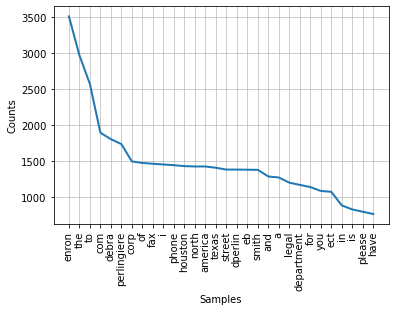

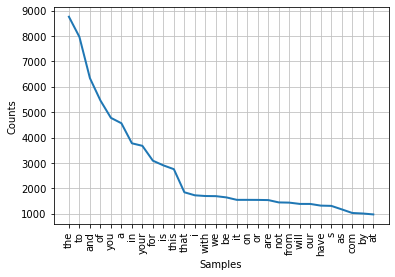

In [28]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk

tokenized_word=[]
fdist = FreqDist()
for i in email_text:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()

tokenized_word=[]
fdist = FreqDist()
for i in spam_text:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()

In [29]:
import sklearn
print(sklearn.__version__)

0.22.2.post1
